# Assessment 4
Please do your work in a single Jupyter notebook. Each queson should be in
an individual cell. Once you have nished the assessment please upload it to
the Moodle submission area, “Assessment 4”. If the format is anything other
than a Jupyter Notebook then your work will not be marked. It is up to you to
ensure that your work runs. Verify this on your Kent Jupyter account BEFORE
you submit it. Clearly label the exercises.  
Brevity and conciseness will be rewarded. Most quesons can be answered 1-3
lines of code.  
Please use the following dataset:  
**hp://raptor.kent.ac.uk/~ds756/Data/kc_house_data_small.csv**  
This is a dataset containing a sample of real-estate sales for King County, WA (it
includes Seale). Each row is a sale in the county.  
Note: in the US, a postcode is called a zip code.  

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   

In [2]:
#Read the file
data=pd.read_csv("http://raptor.kent.ac.uk/~ds756/Data/kc_house_data_small.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,7,1640,0,1966,0,98058,47.4550,-122.182,1340,8346
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,7,1110,510,1950,0,98112,47.6393,-122.308,2100,6500
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,8,1670,0,1912,0,98112,47.6350,-122.284,2100,5400
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,8,1870,0,1990,0,98055,47.4314,-122.204,2020,8912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
2609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
2610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
2611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Task 1 (10 marks)
Create a feature in your dataframe, called **“unit_price”**, that contains price per
square foot for each sale. Use the **“sqft_living”** feature.  

In [3]:
data["unit_price"]=data["price"]/data["sqft_living"]
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,unit_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
1,1423800210,20140923T000000,230000.0,3,1.00,1640,7187,1.0,0,0,...,1640,0,1966,0,98058,47.4550,-122.182,1340,8346,140.243902
2,2125049131,20140729T000000,680000.0,3,1.75,1620,5500,1.0,0,0,...,1110,510,1950,0,98112,47.6393,-122.308,2100,6500,419.753086
3,5318101765,20140602T000000,985000.0,3,1.75,1670,5400,2.0,0,0,...,1670,0,1912,0,98112,47.6350,-122.284,2100,5400,589.820359
4,6624300110,20140623T000000,375000.0,4,2.50,1870,7471,2.0,0,0,...,1870,0,1990,0,98055,47.4314,-122.204,2020,8912,200.534759


# Task 2 (20 marks)
Create a dataframe that consists of two columns. The columns are **“zipcode”**
and the average price per **“sqft_living”** in the corresponding zip code. Each zip 
code will have its own row, and the second column will be the mean price of all
the sales in said zip code.

In [4]:
df_zip=data[["zipcode","unit_price"]].groupby(["zipcode"]).mean()
df_zip

,unit_price
zipcode,
98001,155.791298
98002,152.284512
98003,158.400200
98004,481.385148
98005,294.317493
...,...
98177,288.462758
98178,177.014663
98188,160.873309


# Task 3 (20 marks)
Create a dataframe with two columns: bedrooms and mean price. Each unique
count of bedrooms will have its own row, and the second column will be the
mean price for properes with that many bedrooms. Use a bar plot to display
your dataframe. Give each bar its own colour.

In [5]:
df=data[["bedrooms","price"]].groupby(["bedrooms"]).mean().round()
df

,price
bedrooms,
0,295000.0
1,354109.0
2,422608.0
3,473592.0
4,662161.0
5,800086.0
6,930437.0
7,1040950.0
8,676667.0


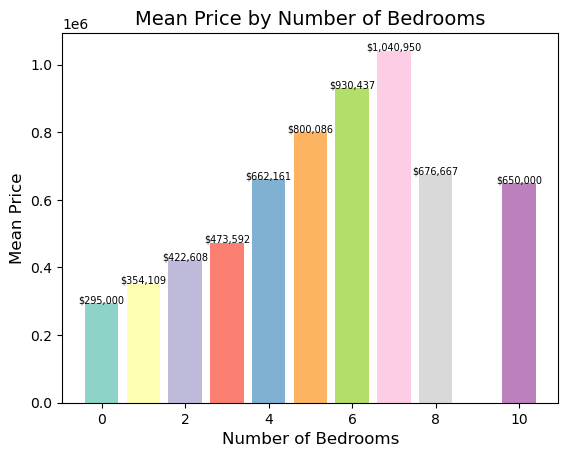

In [6]:
# https://how2matplotlib.com/matplotlib-bar-colors.html I checked the filling colors in this website.
plt.bar(df.index,df["price"],color=plt.cm.Set3(np.arange(len(df))))  

#labeling the x and y axes and the graph
plt.xlabel("Number of Bedrooms", fontsize=12)
plt.ylabel("Mean Price", fontsize=12)
plt.title("Mean Price by Number of Bedrooms", fontsize=14)

#plt.grid (True)  #if you want to see the graph on a grid screen

#adding mean prices on the top of each number of bedrooms
for i, value in enumerate(df["price"]):
    plt.text(df.index[i], value, f"${value:,.0f}", ha='center', fontsize=7)

plt.show () # Render the graph

# Task 4 (20 marks)
Graph “long” versus “lat”. Colour the waterfront properes red, and all others
as blue. Title the plot and label the axis appropriately.

In [7]:
#To see how many varibles in waterfront
data.waterfront.unique()

array([0, 1])

In [8]:
#creating separate dataframes for waterfront based on its values
waterfront=data[data.waterfront==1]
non_waterfront=data[data.waterfront==0]

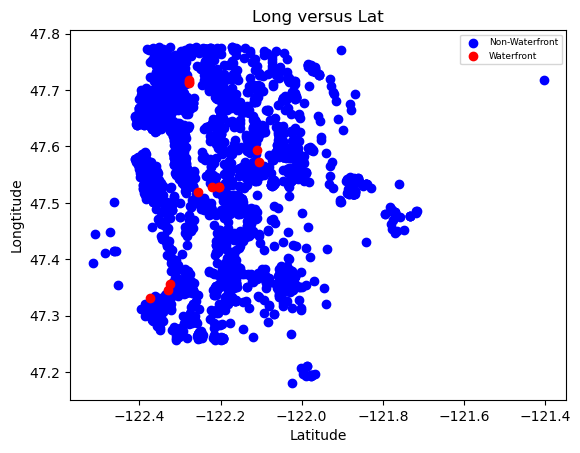

In [9]:
plt.scatter(non_waterfront.long, non_waterfront.lat,c="blue",label="Non-Waterfront") 
plt.scatter(waterfront.long, waterfront.lat,c="red",label="Waterfront") 
#labeling the x and y axes and the graph
plt.xlabel ("Latitude")
plt.ylabel ("Longtitude")
plt.title ("Long versus Lat")

# I learnt adding legend from: https://www.freecodecamp.org/news/how-to-change-legend-fontsize-in-matplotlib/#:~:text=How%20To%20Change%20Legend%20Font%20Size%20in%20Matplotlib%20Using%20the,value%20for%20the%20fontsize%20parameter.&text=We%20assigned%20a%20font%20size,%3A%20fontsize%3D%2220%22%20.
plt.legend(fontsize="6.5",loc ="upper right") 
plt.show () # Render the graph

# Task 5 (30 marks)
Create a time-series from the dataframe (set the index to the date). Plot the
daily mean price. On the same plot, draw (overlay) a line from the smallest
daily average to the highest daily average. The line should appear on top of the
time-series.

In [10]:
#to not chaning the original data.                            
data_copy = data.copy ()
data_copy=data_copy.set_index ("date")  
data_copy.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,unit_price
date,,,,,,,,,,,,,,,,,,,,,
20141013T000000,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847
20140923T000000,1423800210,230000.0,3,1.00,1640,7187,1.0,0,0,3,...,1640,0,1966,0,98058,47.4550,-122.182,1340,8346,140.243902
20140729T000000,2125049131,680000.0,3,1.75,1620,5500,1.0,0,0,3,...,1110,510,1950,0,98112,47.6393,-122.308,2100,6500,419.753086
20140602T000000,5318101765,985000.0,3,1.75,1670,5400,2.0,0,0,5,...,1670,0,1912,0,98112,47.6350,-122.284,2100,5400,589.820359
20140623T000000,6624300110,375000.0,4,2.50,1870,7471,2.0,0,0,3,...,1870,0,1990,0,98055,47.4314,-122.204,2020,8912,200.534759


In [11]:
dataframe=data_copy.groupby(data_copy.index)["price"].mean()
dataframe #if you want to see dataframe

date
20140502T000000    501061.250000
20140504T000000    479975.000000
20140505T000000    594161.600000
20140506T000000    637961.454545
20140507T000000    452506.666667
                       ...      
20150508T000000    701445.000000
20150511T000000    631800.000000
20150512T000000    418500.000000
20150513T000000    592496.666667
20150514T000000    614649.500000
Name: price, Length: 308, dtype: float64

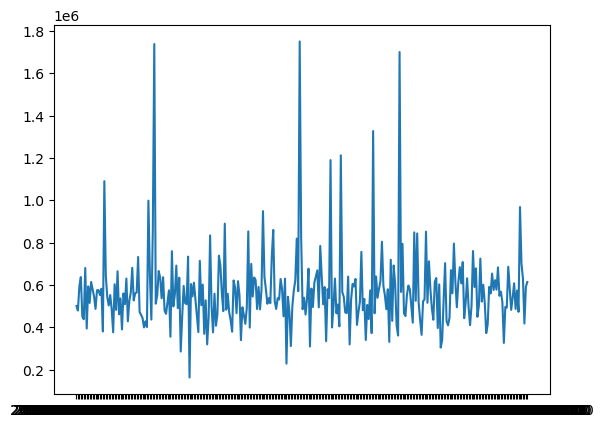

In [12]:
#graph without drawing a line from the smallest daily average to the highest daily average
plt.plot(dataframe)

In [13]:
min_index= dataframe.idxmin()
max_index=dataframe.idxmax()
min_index, max_index

('20140802T000000', '20141101T000000')

In [14]:
min_price=dataframe.min()
max_price=dataframe.max()
min_price, max_price

(163800.0, 1750000.0)

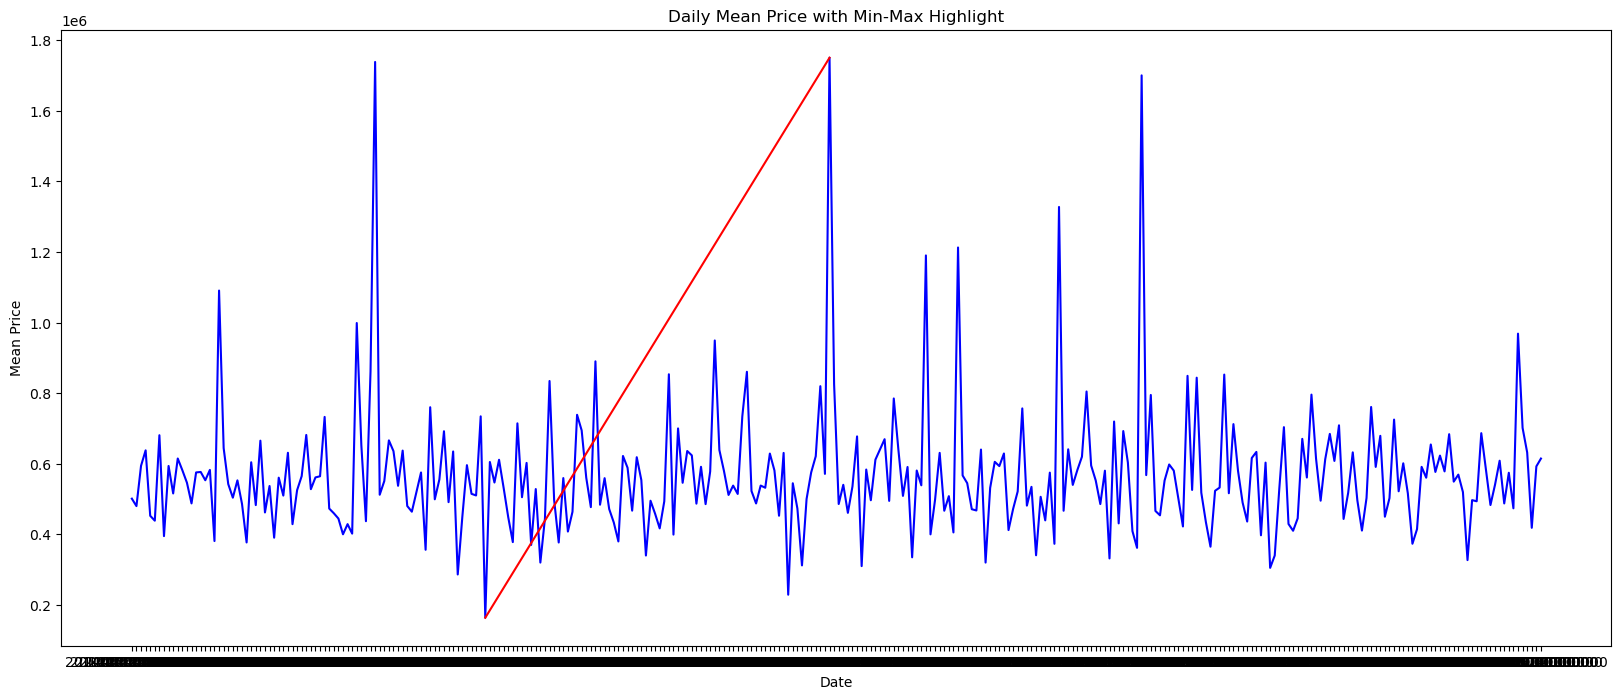

In [15]:
#Ploting the daily mean price and drawing a line from the smallest daily average to the highest daily average.
plt.figure(figsize=(20, 8)) 
plt.plot(dataframe,"b-",[min_index,max_index],[min_price,max_price],"r-")

#labeling the x and y axes and the graph
plt.xlabel ("Date")
plt.ylabel ("Mean Price")
plt.title("Daily Mean Price with Min-Max Highlight")
plt.show() # Render the graph